# Bugs Graph

## 필요 라이브러리 로드

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import os, math

In [73]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [74]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [75]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import chromedriver_autoinstaller as ca
import random, time
from datetime import datetime

## 파일 불러오기

In [76]:
site_name = 'bugs'

In [77]:
# 기간 설정
start_date = '2022-04-18'
end_date = '2022-04-23'

In [78]:
code_path = 'c:/data/Wantreez/Crawling/music'
code_path

'c:/data/Wantreez/Crawling/music'

In [79]:
# 실시간 순위 파일 폴더로 이동
live_folder = f'/crawled_data/live_{site_name}/'
try:
    os.chdir(code_path + live_folder)
except:
    pass

In [80]:
file_list = os.listdir()
for i, s in enumerate(file_list):
    print(i, s)

0 live_bugs_20220422_105549.xlsx
1 live_bugs_20220425_110806.xlsx
2 live_bugs_20220426_110837.xlsx
3 live_bugs_20220427_110836.xlsx
4 live_bugs_20220428_110800.xlsx
5 live_bugs_20220429_110800.xlsx
6 live_bugs_20220430_110800.xlsx
7 live_bugs_20220501_110800.xlsx
8 live_bugs_20220502_110800.xlsx
9 live_bugs_20220503_110800.xlsx


## 수집한 파일 모두 합치기

In [81]:
df = pd.DataFrame()
for one in file_list:
    temp = pd.read_excel(one)
    df = pd.concat([df, temp], ignore_index=True)
df.head()

,날짜,순위,곡,가수,앨범
0,2022-04-22,1,LOVE DIVE,IVE (아이브),LOVE DIVE
1,2022-04-22,2,Seoul,볼빨간사춘기,Seoul
2,2022-04-22,3,그대가 있기에,노을,그대가 있기에
3,2022-04-22,4,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
4,2022-04-22,5,Love story,볼빨간사춘기,Seoul


In [82]:
sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
sliced_df.head()

,날짜,순위,곡,가수,앨범
0,2022-04-22,1,LOVE DIVE,IVE (아이브),LOVE DIVE
1,2022-04-22,2,Seoul,볼빨간사춘기,Seoul
2,2022-04-22,3,그대가 있기에,노을,그대가 있기에
3,2022-04-22,4,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
4,2022-04-22,5,Love story,볼빨간사춘기,Seoul


In [83]:
sliced_df.tail()

,날짜,순위,곡,가수,앨범
95,2022-04-22,96,너의 우주는 (Universe_),원위 (ONEWE),Planet Nine : VOYAGER
96,2022-04-22,97,Greatest Love of All,Whitney Houston(휘트니 휴스턴),Whitney Houston (The Deluxe Anniversary Edition)
97,2022-04-22,98,어머님께,지오디(god),Chapter 1
98,2022-04-22,99,야행성 (Regulus),원위 (ONEWE),2/4
99,2022-04-22,100,별 보러 가자,박보검,별 보러 가자


In [84]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      100 non-null    object
 1   순위      100 non-null    int64 
 2   곡       100 non-null    object
 3   가수      100 non-null    object
 4   앨범      100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


### 수집한 곡의 유니크

In [85]:
len(sliced_df['곡'].unique())

99

In [86]:
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

,날짜
0,2022-04-18
1,2022-04-19
2,2022-04-20
3,2022-04-21
4,2022-04-22
5,2022-04-23


### 제목과 가수 매칭 값 추출

In [87]:
sort_df = sliced_df[['곡', '가수']]
sort_df

,곡,가수
0,LOVE DIVE,IVE (아이브)
1,Seoul,볼빨간사춘기
2,그대가 있기에,노을
3,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
4,Love story,볼빨간사춘기
...,...,...
95,너의 우주는 (Universe_),원위 (ONEWE)
96,Greatest Love of All,Whitney Houston(휘트니 휴스턴)
97,어머님께,지오디(god)
98,야행성 (Regulus),원위 (ONEWE)


In [88]:
sort_df = sort_df.drop_duplicates(['곡', '가수'], ignore_index=True)
sort_df

,곡,가수
0,LOVE DIVE,IVE (아이브)
1,Seoul,볼빨간사춘기
2,그대가 있기에,노을
3,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
4,Love story,볼빨간사춘기
...,...,...
95,너의 우주는 (Universe_),원위 (ONEWE)
96,Greatest Love of All,Whitney Houston(휘트니 휴스턴)
97,어머님께,지오디(god)
98,야행성 (Regulus),원위 (ONEWE)


### 순위변동 열 추가한 df 생성
* 기본 날짜에 데이터 추가
* nan값 중 곡, 가수, 앨범 명은 해당 가수의 정보로 채우기

In [89]:
song_df_list = []
for i in range(sort_df.shape[0]):
    temp = sort_df.iloc[i, :]
    one_df = sliced_df[(sliced_df['곡'] == temp['곡']) & (sliced_df['가수'] == temp['가수'])].reset_index(drop=True)
    one_df['순위변동'] = - ( one_df['순위'] - one_df['순위'].shift(1) )
    one_df['순위변동'] = one_df['순위변동'].fillna(0)
    one_df['순위변동'] = one_df['순위변동'].astype('int64')
    merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
    title = merged_df['곡'].value_counts().index[0]
    artist = merged_df['가수'].value_counts().index[0]
    album = merged_df['앨범'].value_counts().index[0]
    merged_df['곡'] = merged_df['곡'].fillna(title)
    merged_df['가수'] = merged_df['가수'].fillna(artist)
    merged_df['앨범'] = merged_df['앨범'].fillna(album)
    song_df_list.append(merged_df)

### 노래 개수

In [90]:
len(song_df_list)

100

## 그래프 테스트

### 노래 선택

In [91]:
song_df_list[17].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      6 non-null      object 
 1   순위      1 non-null      float64
 2   곡       6 non-null      object 
 3   가수      6 non-null      object 
 4   앨범      6 non-null      object 
 5   순위변동    1 non-null      float64
dtypes: float64(2), object(4)
memory usage: 336.0+ bytes


In [92]:
tmp = song_df_list[17]
tmp

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-18,NaN,별,볼빨간사춘기,Seoul,NaN
1,2022-04-19,NaN,별,볼빨간사춘기,Seoul,NaN
2,2022-04-20,NaN,별,볼빨간사춘기,Seoul,NaN
3,2022-04-21,NaN,별,볼빨간사춘기,Seoul,NaN
4,2022-04-22,18.0,별,볼빨간사춘기,Seoul,0.0
5,2022-04-23,NaN,별,볼빨간사춘기,Seoul,NaN


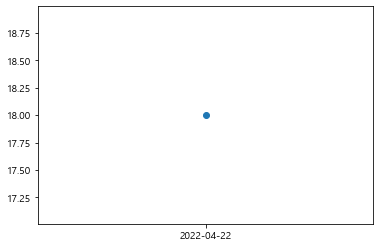

In [93]:
plt.plot(tmp['날짜'], tmp['순위'], '-o')

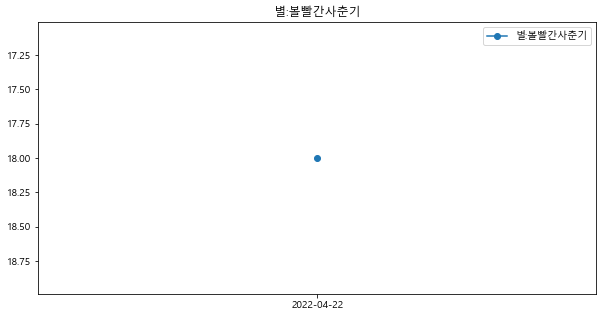

In [94]:
title = tmp['곡'].value_counts().index.values[0]
artist = tmp['가수'].value_counts().index.values[0]
song_label = title + ':' + artist

plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.plot(tmp['날짜'], tmp['순위'], '-o', label=song_label)
plt.title(song_label)
plt.legend()
plt.show()

In [95]:
temp_df = song_df_list[70:91]

### 그래프

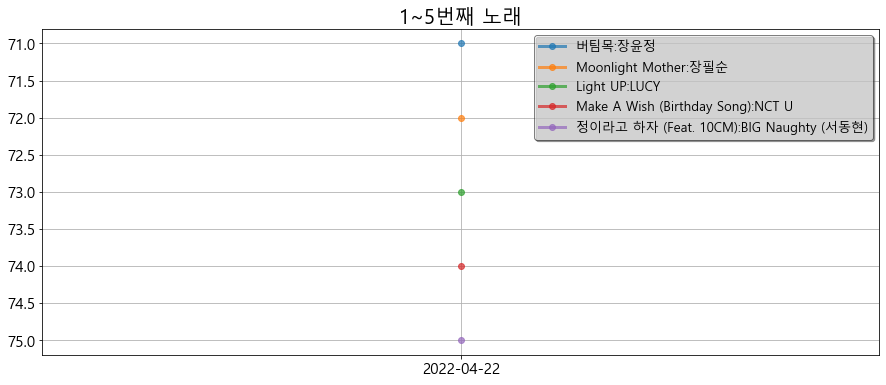

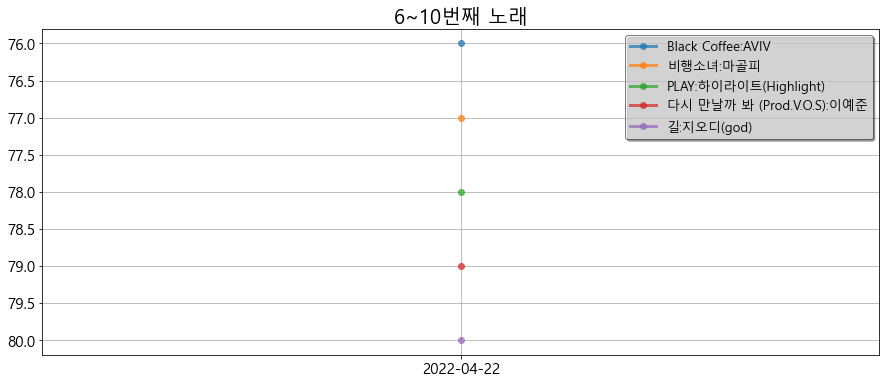

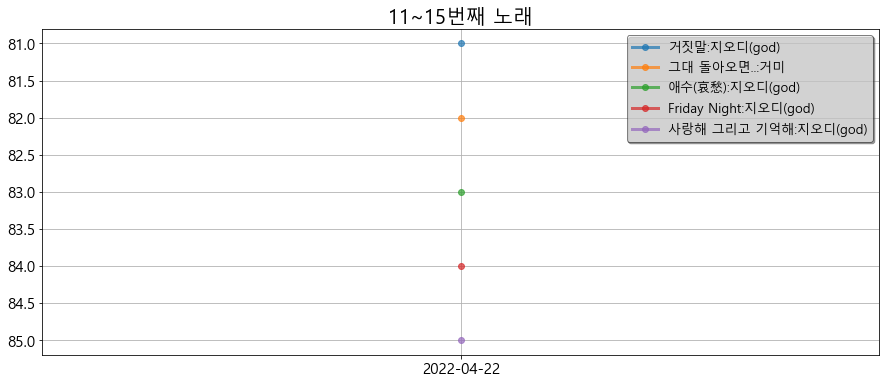

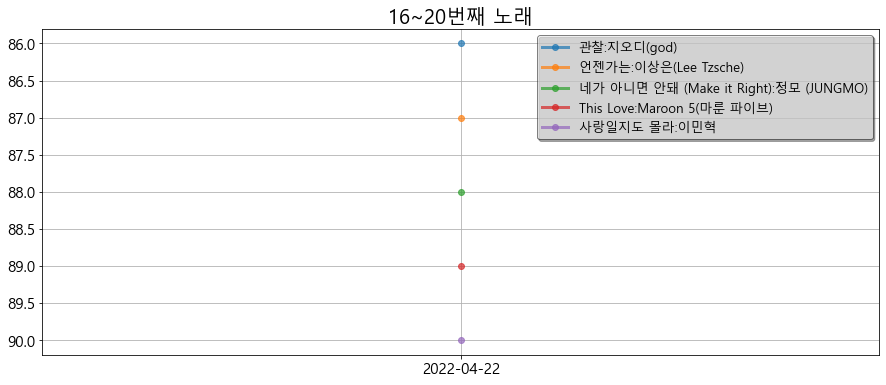

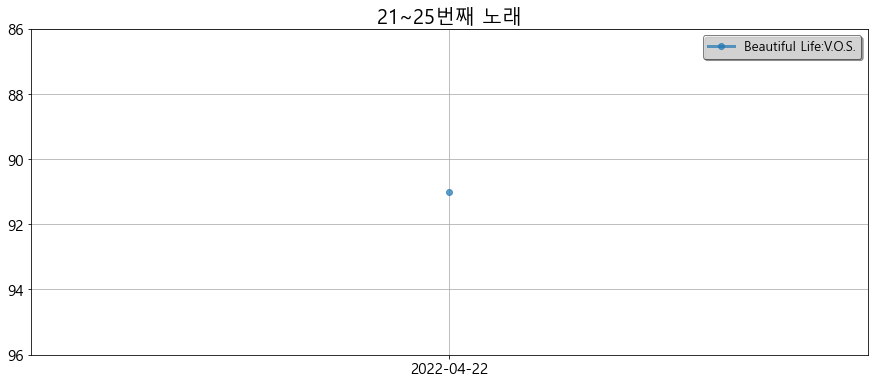

In [96]:
number = 5
t = 0
for i in range( math.ceil(len(temp_df)/number) ):
    plt.figure( figsize=(15, 7) )
    ax = plt.axes()
    ax.invert_yaxis()
    graph_df = temp_df[i*number:(i+1)*number]
    for one in graph_df:
        title = one['곡'].value_counts().index.values[0]
        artist = one['가수'].value_counts().index.values[0]
        song_label = title + ':' + artist
        plt.plot(one['날짜'], one['순위'], '-o', label=song_label, alpha=0.7, linewidth=3)
    t =  t + number
    plt.grid(True)
    plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(framealpha=0.5, frameon=True, shadow=True, edgecolor='k', fontsize=13)
    plt.show()

## 몇 개씩 묶어서 노래 시각화

### 순위 그래프

In [97]:
def rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 7) )
        ax = plt.axes()
        ax.invert_yaxis()
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ':' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

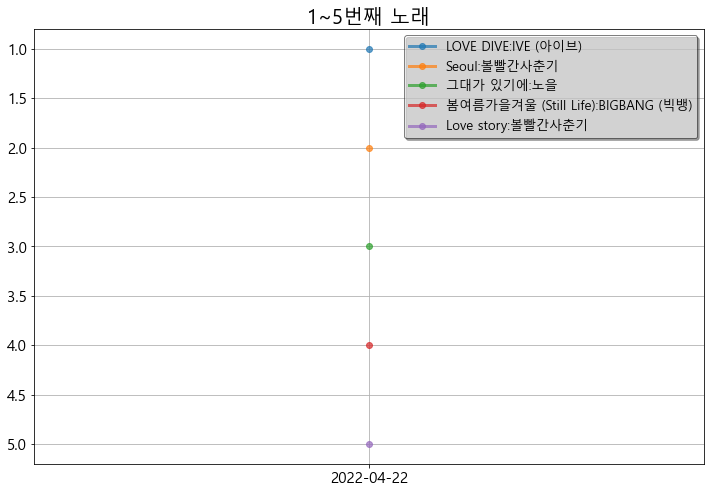

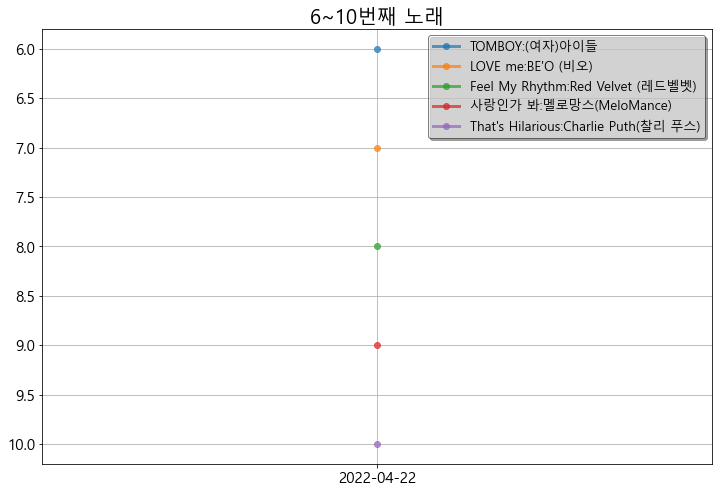

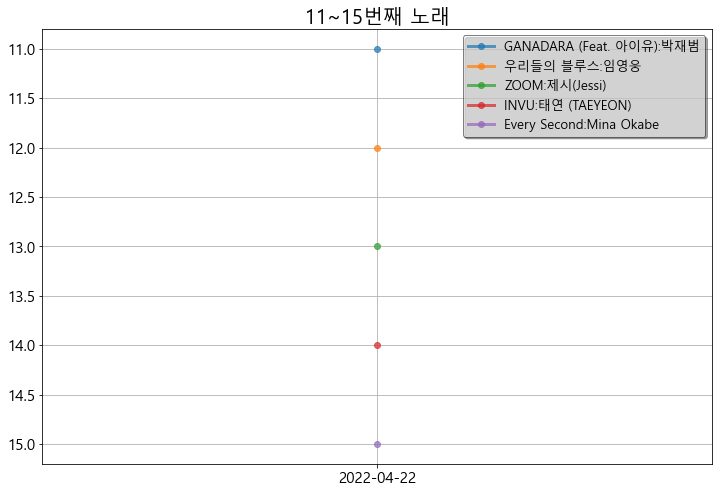

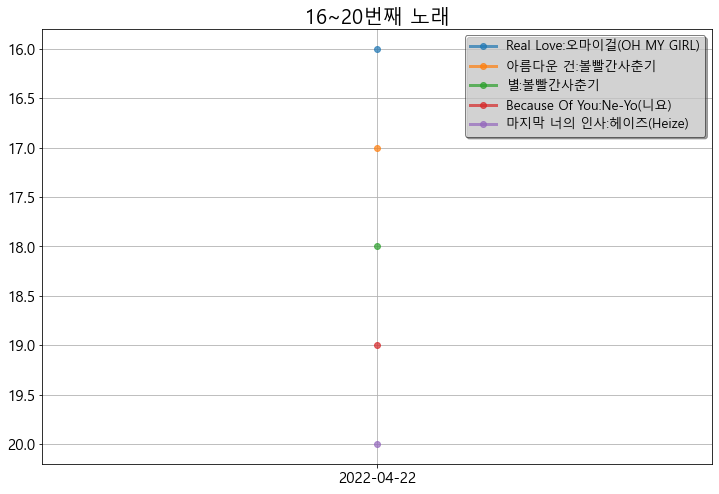

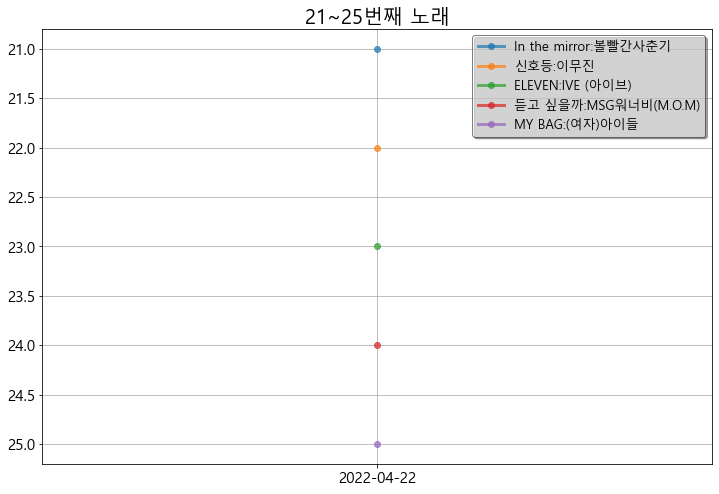

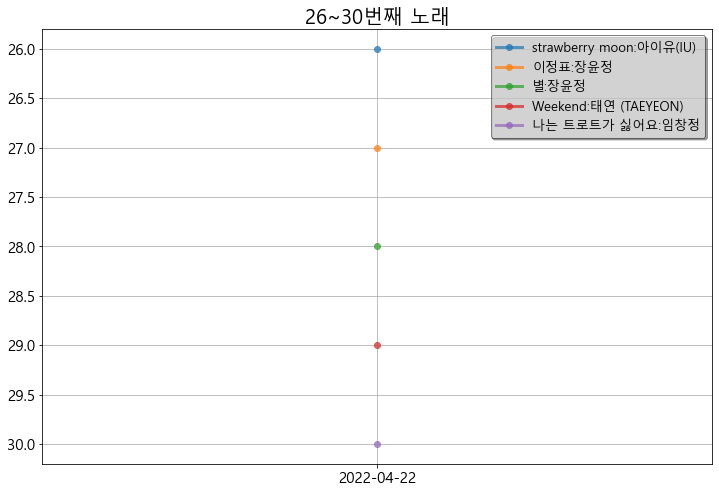

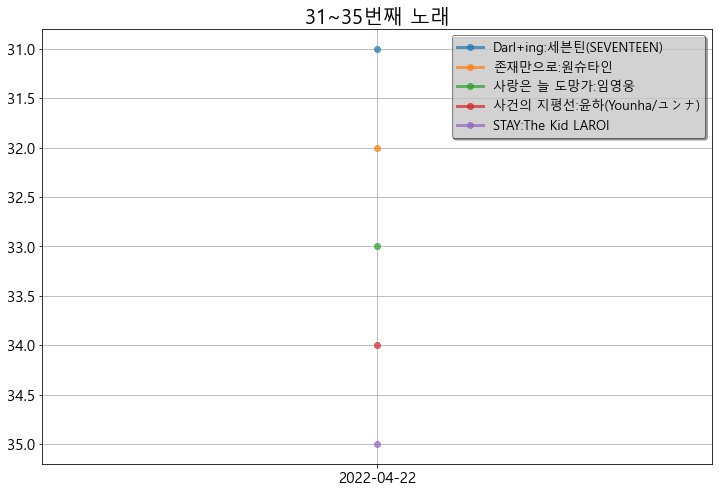

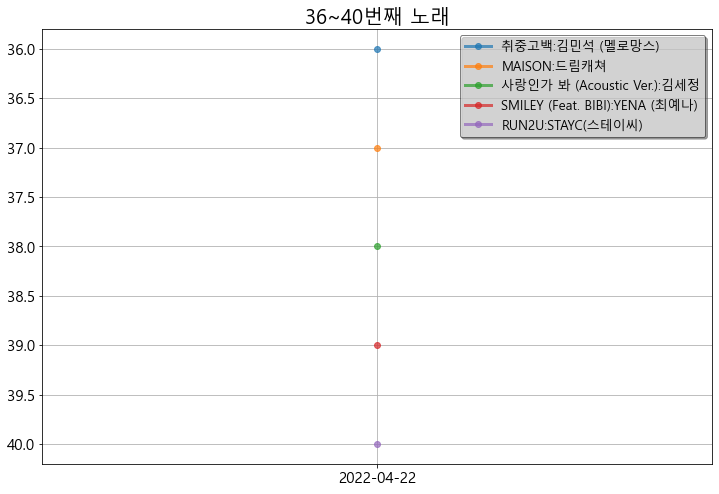

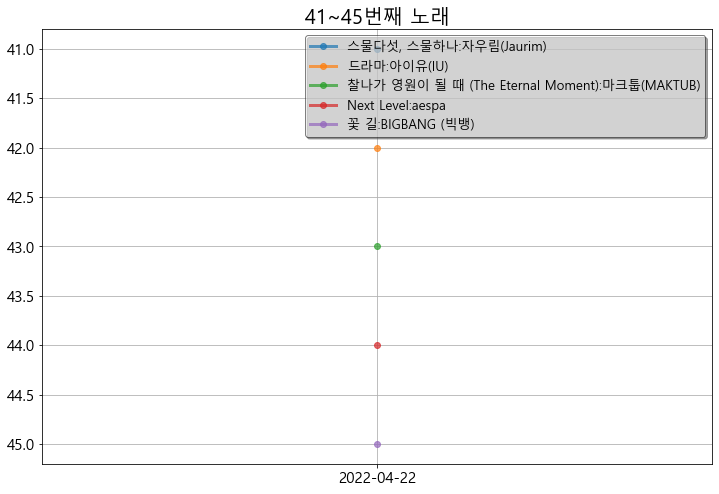

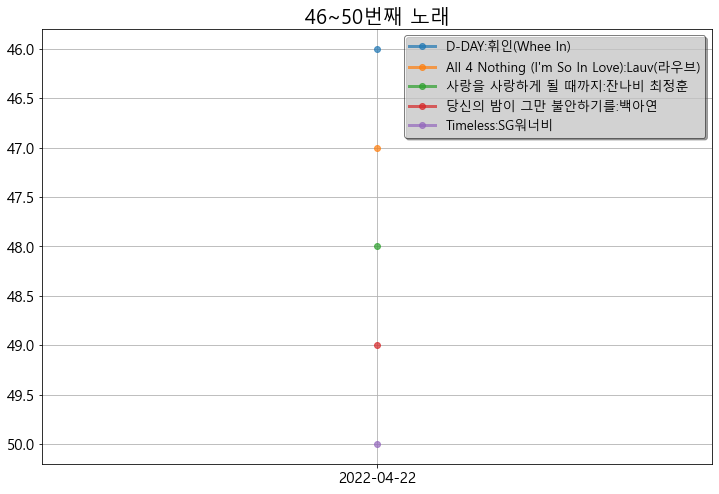

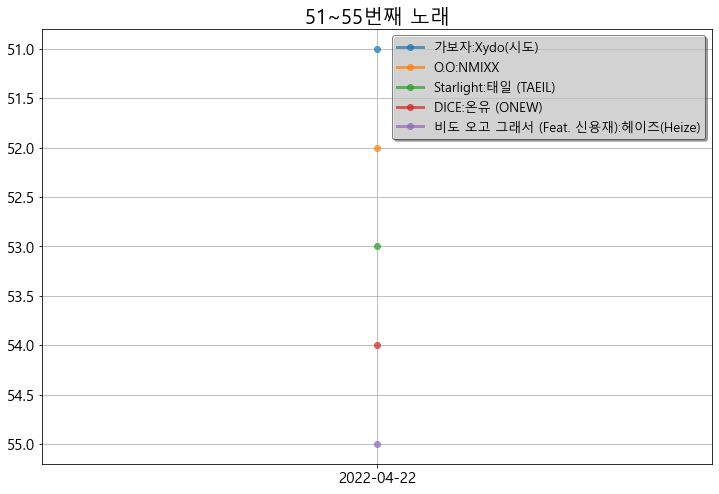

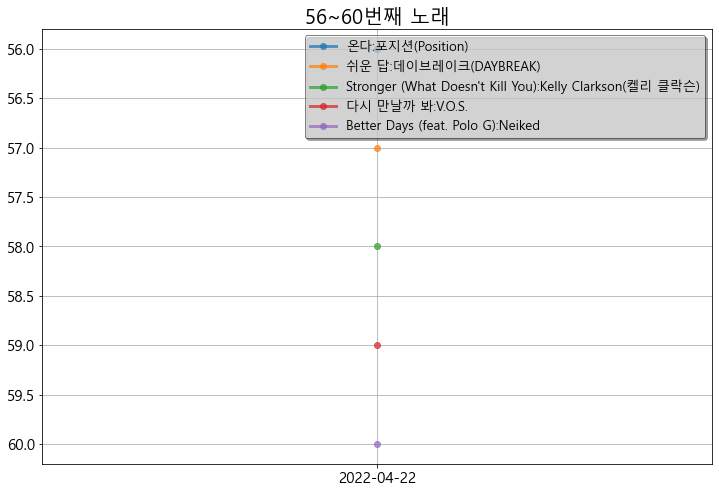

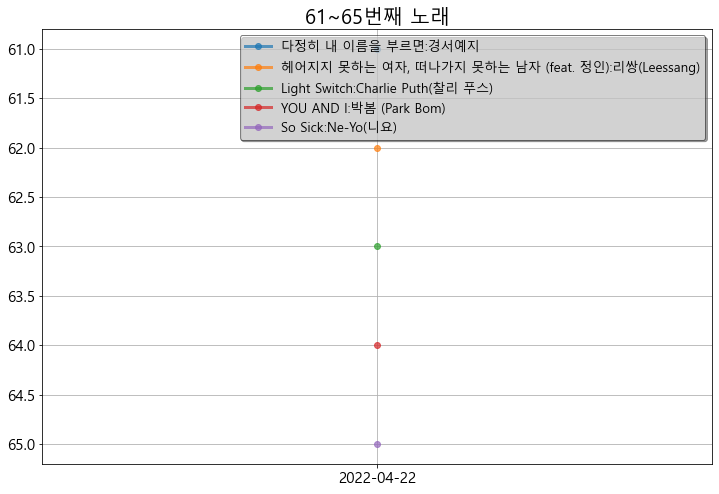

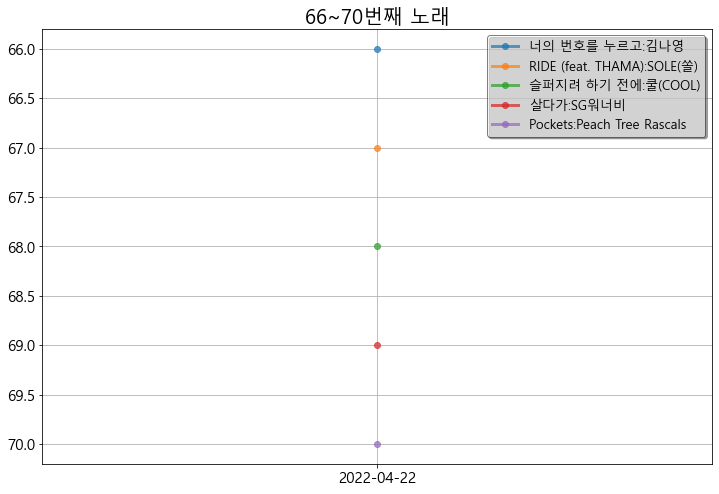

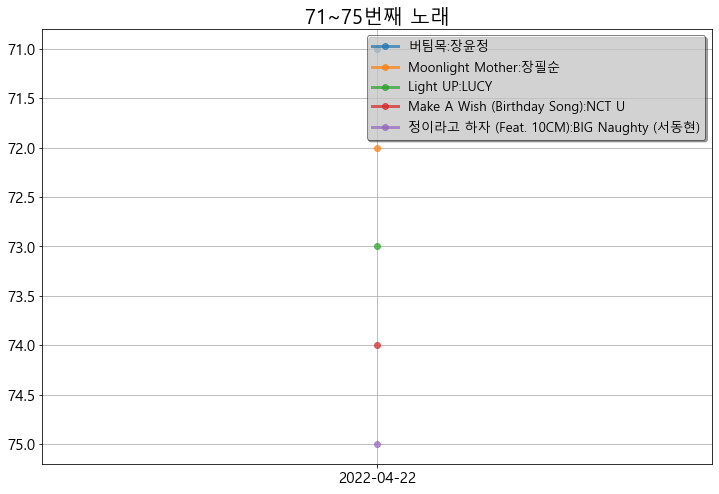

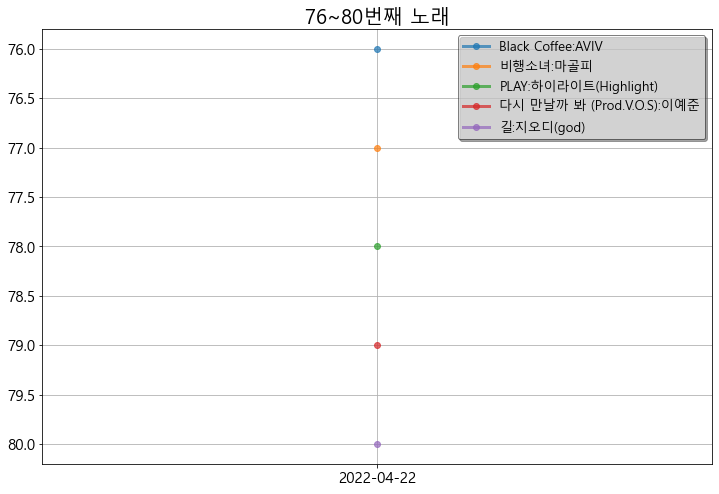

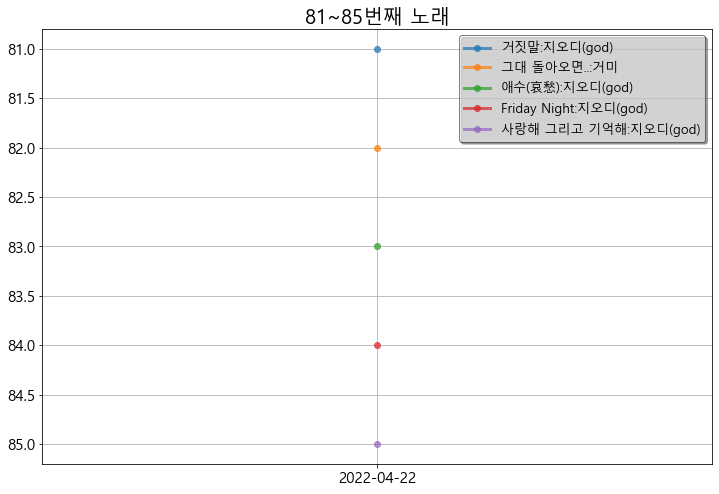

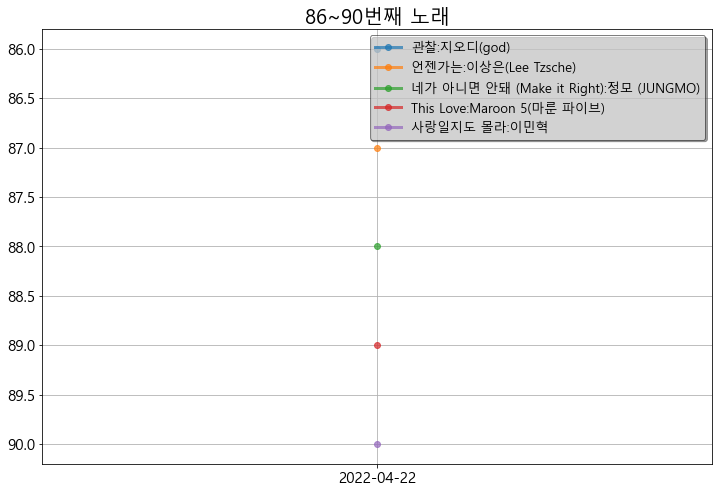

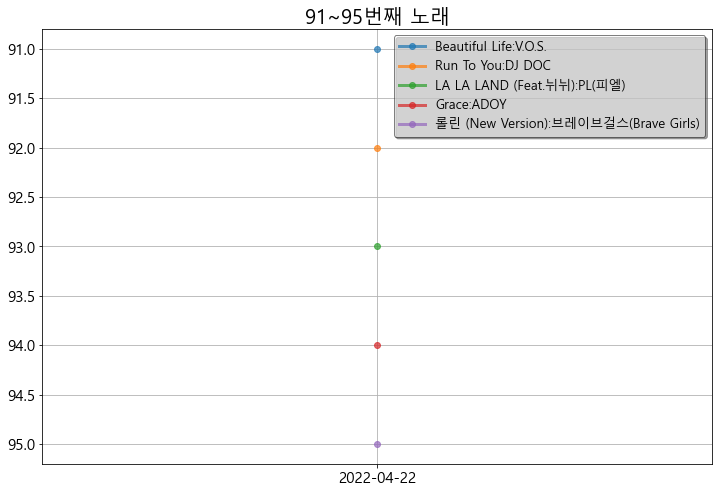

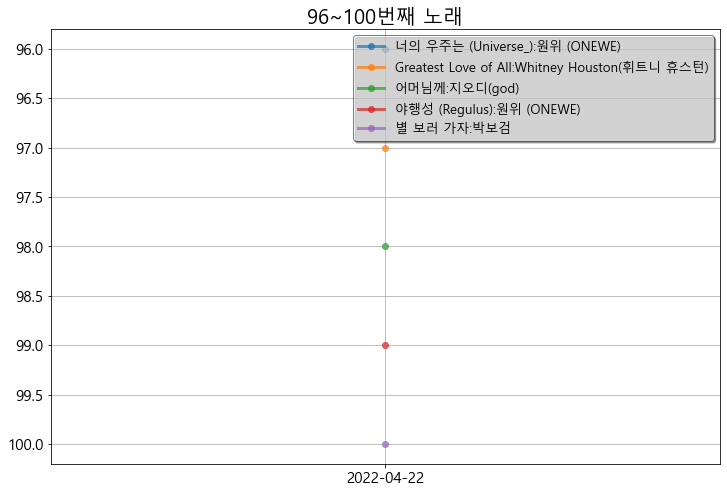

In [98]:
rank_graph(song_df_list, 5)

### 순위 변동 그래프

In [99]:
def change_rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 7) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위변동'], '-o', label=song_label, alpha=0.7, linewidth=3)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

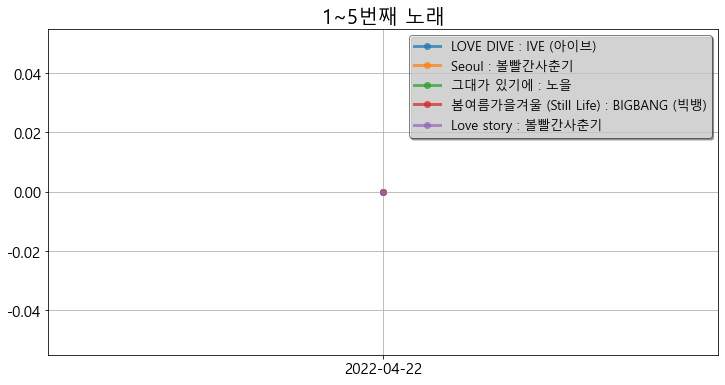

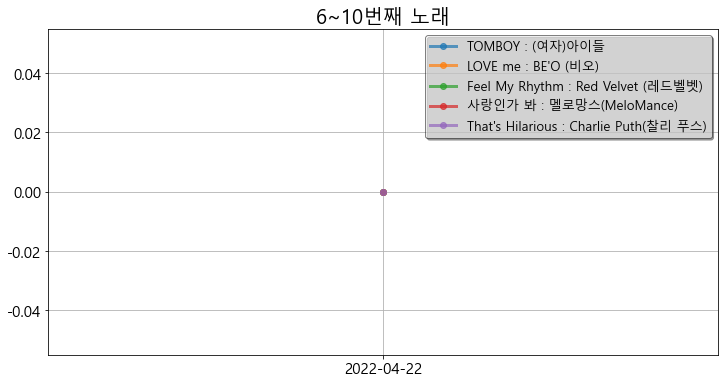

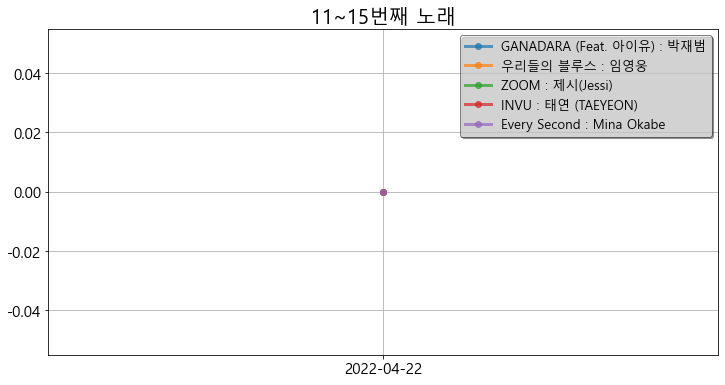

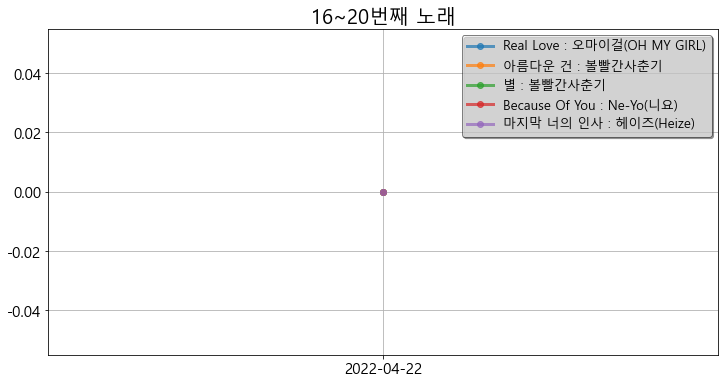

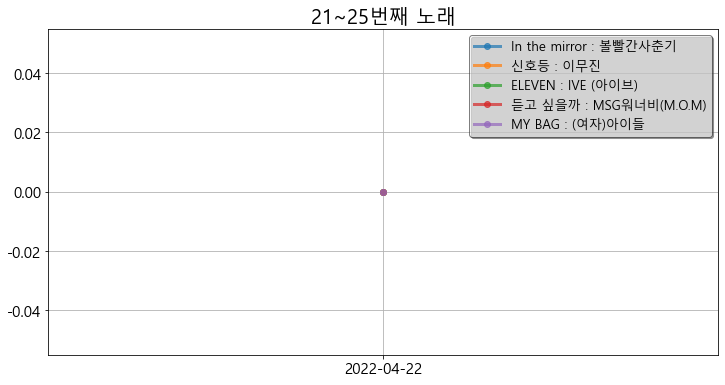

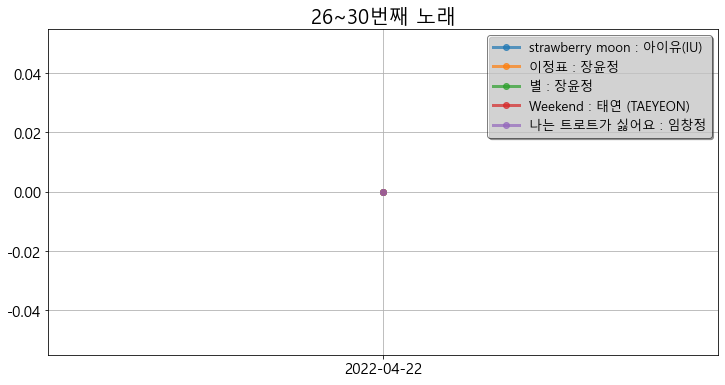

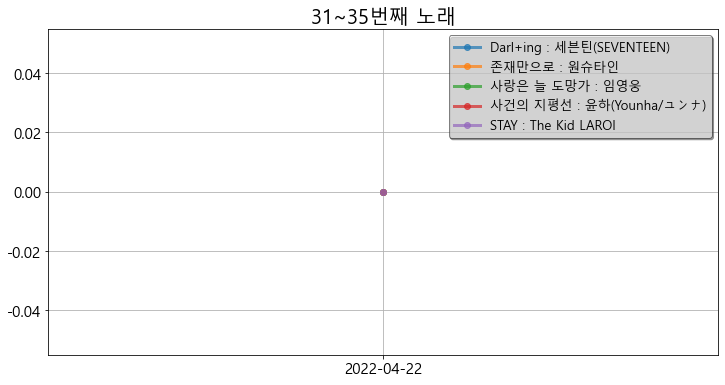

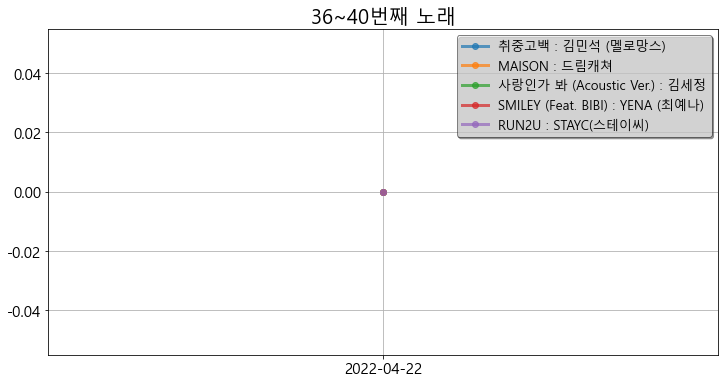

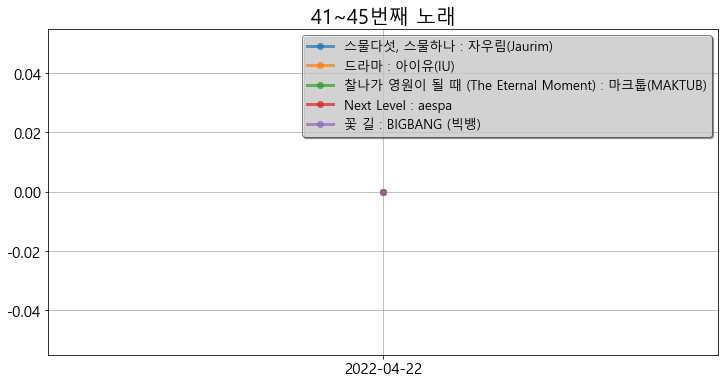

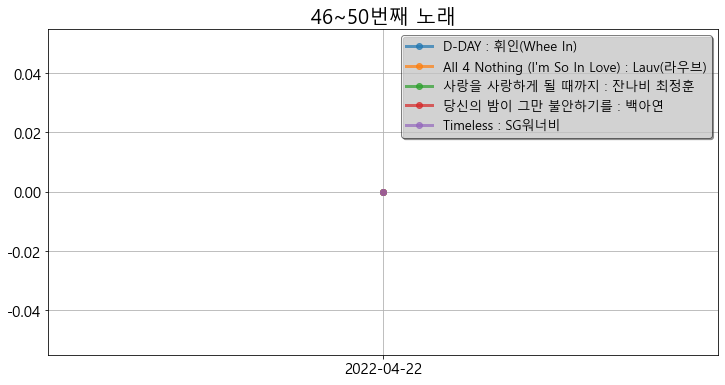

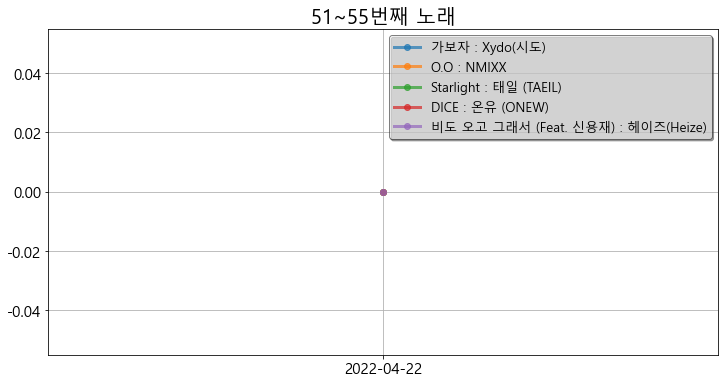

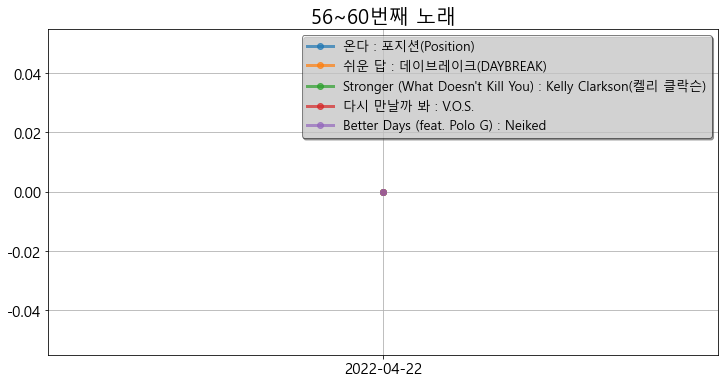

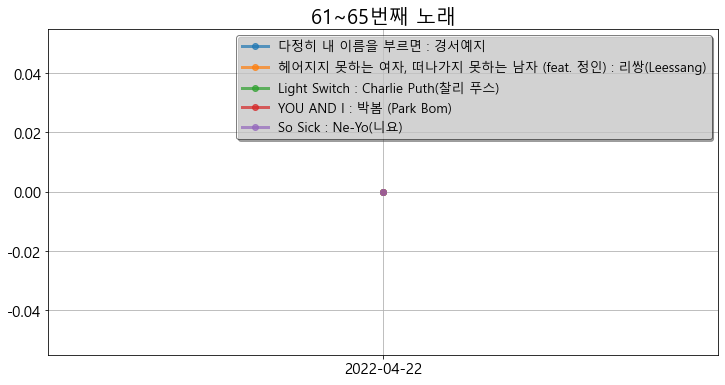

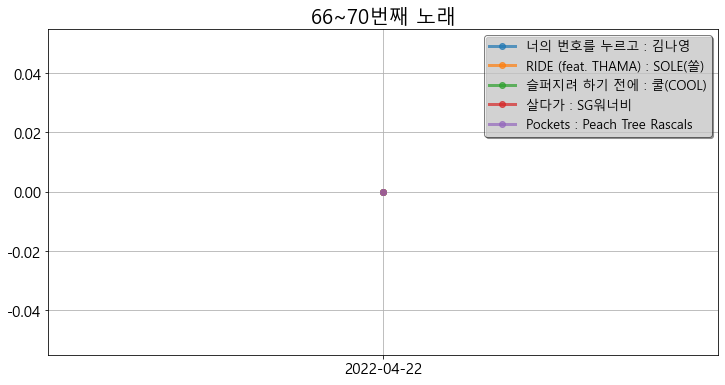

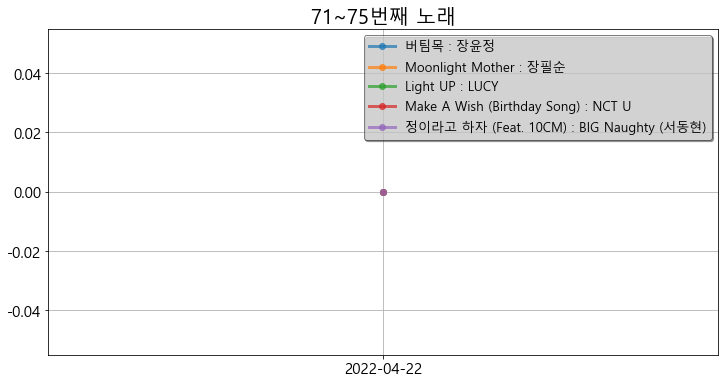

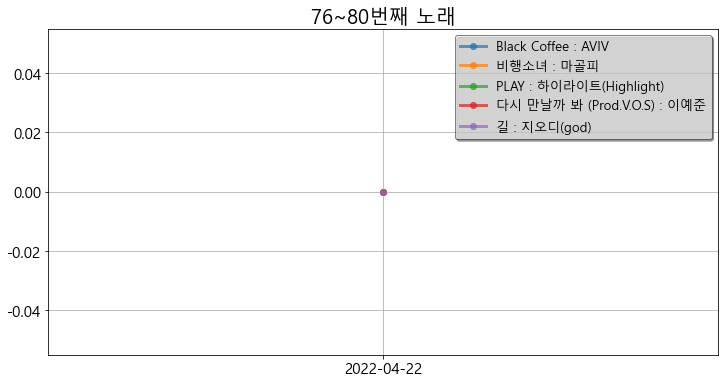

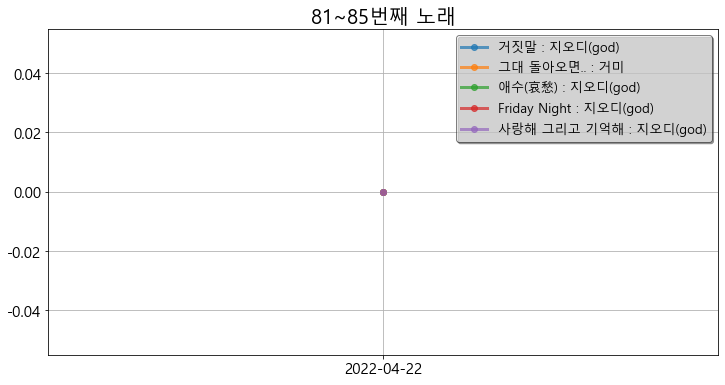

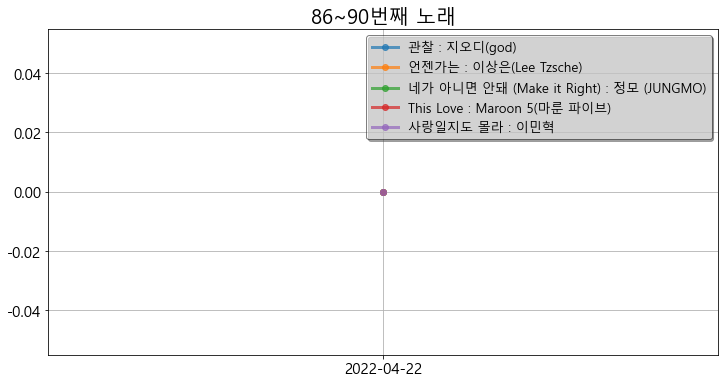

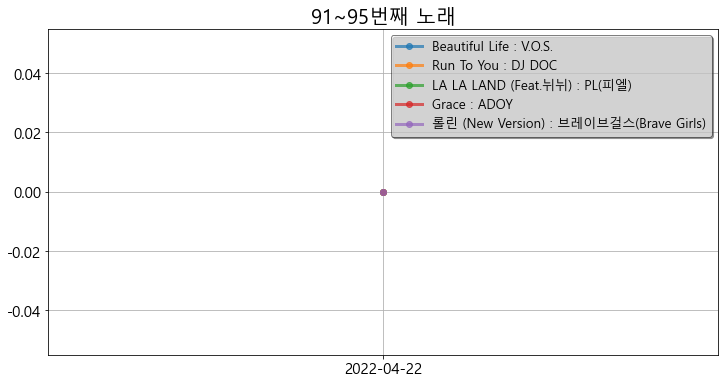

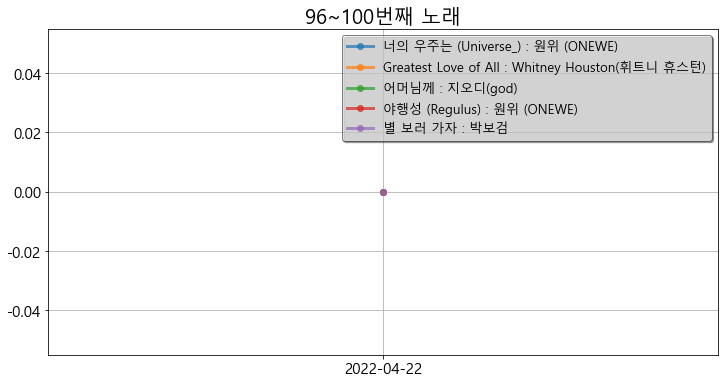

In [100]:
# 노래별 df, 노래 몇개씩 그래프에 나타날지 설정.
change_rank_graph(song_df_list, 5)

## 급등 음원 추출

### 모든 곡 데이터 병합

In [101]:
total_df = pd.DataFrame()
for one in song_df_list:
    total_df = pd.concat([total_df, one], ignore_index=True)

In [102]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      600 non-null    object 
 1   순위      100 non-null    float64
 2   곡       600 non-null    object 
 3   가수      600 non-null    object 
 4   앨범      600 non-null    object 
 5   순위변동    100 non-null    float64
dtypes: float64(2), object(4)
memory usage: 28.2+ KB


In [103]:
total_df['순위변동'].describe()

count    100.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: 순위변동, dtype: float64

In [104]:
total_df[ total_df['순위변동'] > 0 ]['순위변동'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 순위변동, dtype: float64

In [105]:
Q1 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.25)
Q3 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.75)
IQR = Q3 - Q1
u_outlier = Q3 + 1.5*IQR
print(Q1, Q3, IQR, u_outlier)

nan nan nan nan


### 이상치 곡 추출

In [106]:
total_df[ total_df['순위변동'] > u_outlier ]

,날짜,순위,곡,가수,앨범,순위변동


### 급등 음원의 샘플 추출

In [107]:
big_change_music_name_list = total_df[ total_df['순위변동'] > u_outlier ]['곡'].tolist()
big_change_music_name_list

[]

In [108]:
temp = total_df[ total_df['곡'] == big_change_music_name_list[2]].reset_index(drop=True)
temp

IndexError: list index out of range

In [ ]:
title = temp['곡'].value_counts().index[0]
title

'Seoul'

In [ ]:
artist = temp['가수'].value_counts().index[0]
artist

'볼빨간사춘기'

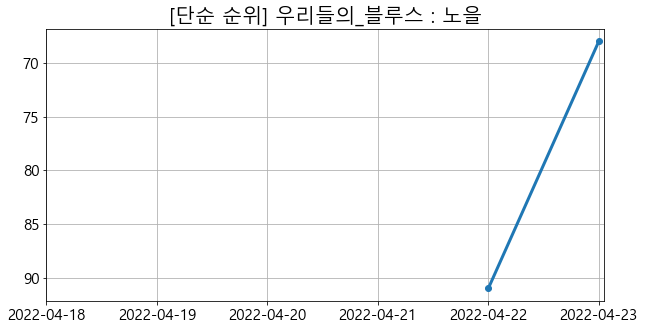

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.grid(True, zorder=1)
plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, zorder=2)
# plt.bar(temp['날짜'], temp['순위'], zorder=2, edgecolor='r', width=0.3, linestyle='-.', capstyle='round')
graph_title = '[단순 순위] ' + title + ' : ' + artist
plt.title(graph_title, fontdict={'size':20})
plt.xticks(temp['날짜'], fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 이상치 곡의 순위 그래프

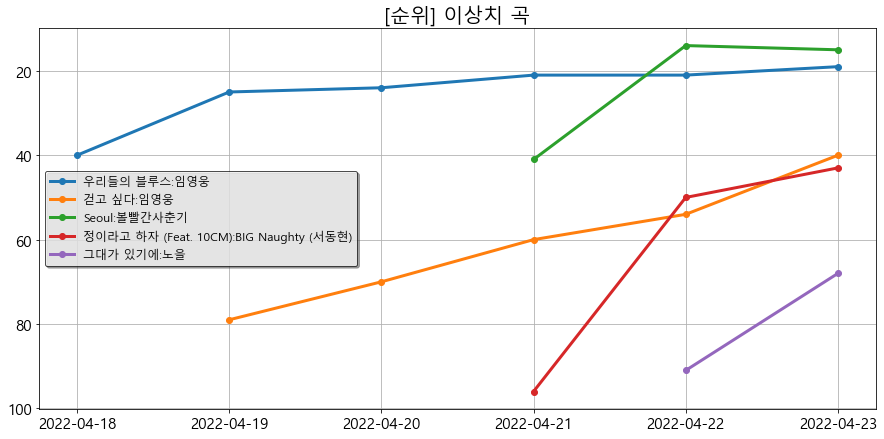

In [ ]:
plt.figure(figsize=(15,7))
ax = plt.axes()
ax.invert_yaxis()
plt.grid(True)
for one in big_change_music_name_list:
    temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
    title = temp['곡'].value_counts().index[0]
    artist = temp['가수'].value_counts().index[0]
    song_label = title + ':' + artist
    plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, label=song_label)
    plt.title('[순위] 이상치 곡', fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
plt.show()

### 이상치 곡의 순위변동 그래프

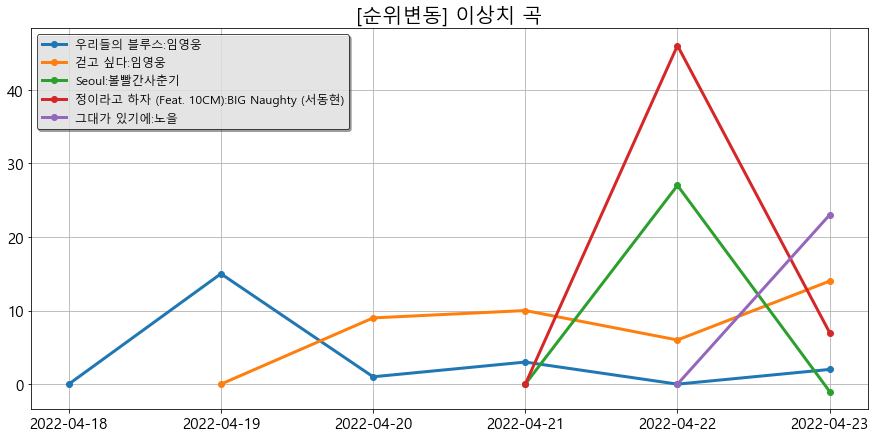

In [ ]:
plt.figure(figsize=(15,7))
plt.grid(True)
for one in big_change_music_name_list:
    temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
    title = temp['곡'].value_counts().index[0]
    artist = temp['가수'].value_counts().index[0]
    song_label = title + ':' + artist
    plt.plot(temp['날짜'], temp['순위변동'], '-o', linewidth=3, label=song_label)
    plt.title('[순위변동] 이상치 곡', fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
plt.show()

## 이상치 곡의 구글 트랜드 분석

In [ ]:
ca.install(True)
driver = webdriver.Chrome()

## 구글 트렌드 정리

In [ ]:
for one in big_change_music_name_list:
    # 구글 트렌트 접속
    url = 'https://trends.google.co.kr/trends/?geo=KR'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()
    # 검색어 입력
    search_box = driver.find_elements_by_css_selector('input')[1]
    search_box.clear()
    search_box.send_keys(one)
    time.sleep(0.5)
    search_box.send_keys(Keys.ENTER)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1.5, 2) )
    
    # csv 파일 다운
    driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/md-content/div/div/div[1]/trends-widget/ng-include/widget/div/div/div/widget-actions/div/button[1]').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    search_artist = total_df[total_df['곡'] == one]['가수'].unique()[0]
    search_title = one.replace(' ', '_')
    today_date = datetime.today().strftime('%Y%m%d_%H%M%S')
    file_oldname = os.path.join('C:/Users/kbjung/Downloads', 'multiTimeline.csv')
    file_newname = os.path.join('C:/Users/kbjung/Downloads', f'[{site_name}]{today_date}_{search_title}_{search_artist}.csv')
    os.rename(file_oldname, file_newname)
    time.sleep(2)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_4956/1653989980.py:9: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  search_box = driver.find_elements_by_css_selector('input')[1]
C:\Users\kbjung\AppData\Local\Temp/ipykernel_4956/1653989980.py:18: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/md-content/div/div/div[1]/trends-widget/ng-include/widget/div/div/div/widget-actions/div/button[1]').click()


# 코드 마지막